# Exercise 2 - Probability
**R code presented in this excercise is not required on homeworks or exams, its only to show what is possible in R an to complement the excercise with nice graphs.** 
## Adéla Vrtková, Michal Béreš, Martina Litschmannová
 


In this exercise, we will go through an introduction to probability. We assume you are familiar with the terms: **definition of probability, conditional probability, total probability theorem, Bayes' theorem**.
 
# Auxiliary functions
 
## Total probability
 
$P(A)=\sum_{i=1}^{n}P(B_i)P(A|B_i)$
 


In [ ]:
# probability calculation P(A) - total probability theorem
total_probability = function(P_B, P_AB)
{   # we consider P_B as a vector of values P(B_i) and P_AB as a vector of values P(A|B_i)
    P_A = 0
    for (i in 1:length(P_B))
    {
        P_A = P_A + P_B[i]*P_AB[i]
    }
    return(P_A)
}

## Bayes' theorem
 
$P(B_k|A)=\frac{P(B_k)P(A|B_k)}{\sum_{i=1}^{n}P(B_i)P(A|B_i)}$
 


In [ ]:
# calculation of conditional probability P(B_k|A) - Bayes' theorem
bayes = function(P_B, P_AB, k)
{   # we consider P_B as a vector of values P(B_i), P_AB as a vector of values P(A|B_i) and k as and index in P(B_k|A)
    P_A = total_probability(P_B, P_AB)
    P_BkA = P_B[k]*P_AB[k]/P_A
    return(P_BkA)
} 

**We will add functions from the last exercise for computing combinatorial selections, they are in the combinatorics script.R**
 


In [ ]:
source('combinatorics.R')

# Examples
 
## Example 1.
 
Determine the probability that a number greater than 14 will fall on a 20-wall fair dice roll.
 


In [ ]:
omega = 1:20
A = c(15,16,17,18,19,20)
# probability as a proportion favorable to all
length(A)/length(omega)

## Example 2.
 
Determine the probability that a number greater than 14 will fall on a 20-wall dice roll, if you know that even numbers fall twice as often as odd numbers.
 


In [ ]:
p_odd = 1/(20+10)
p_even = 2*p_odd
probability = c(p_odd, p_even, p_odd, p_even, p_odd, p_even, p_odd, p_even, p_odd, p_even, 
                p_odd, p_even, p_odd, p_even, p_odd, p_even, p_odd, p_even, p_odd, p_even)
probability
# probability is
sum(probability[15:20])

## Example 3.
 
Determine the probability that you will guess exactly 4 numbers in the lottery.(6 numbers out of 49 are drawn)
 


In [ ]:
(combinations(6,4)*combinations(43,2))/combinations(49,6)

## Example 4.
 
From the alphabetical list of students enrolled in the exercise, the teacher selects the first 12 and offers them a bet: “If each of you was born in a different zodiac sign, I will give each of you CZK 100. However, if there are at least two students among you who were born in the same sign, each of you will give me 100 CZK. ”Is it worthwhile for students to accept a bet? How likely are students to win?
 


In [ ]:
permutation(12)/r_permutation_repetition(12,12)

## Example 5.
 
Calculate the probability that an electric current will flow from point 1 to point 2 if part of the el. circuit, including the probability of failure of individual components is indicated in the following figure.(The failures of the individual components are independent of each other.) </br> 
 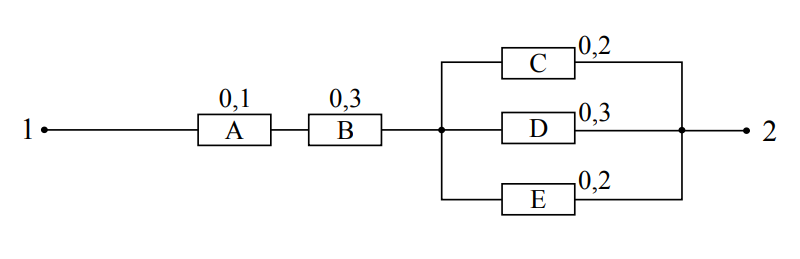
 


In [ ]:
# divided into blocks I=(A, B) and II=(C, D, E)
PI = 1 - (1 - 0.1)*(1 - 0.3)
PI
PII = 0.2*0.3*0.2
PII
# result
(1 - PI)*(1-PII)

## Example 6.
 
The patient is suspected of having one of four mutually exclusive diseases - N1, N2, N3, N4 with a probability of occurrence of P(N1)=0.1; P(N2)=0.2; P(N3)=0.4; P(N4)=0.3. Laboratory test A is positive in the case of the first disease in 50% of cases, in the second disease in 75% of cases, in the third disease in 15% of cases and in the fourth in 20% of cases. What is the probability that the result of the laboratory test will be positive?
 


In [ ]:
# total probability theorem
P_N = c(0.1,0.2,0.4,0.3) # P(N1), P(N2),...
P_PN = c(0.5,0.75,0.15,0.2) # P(P|N1), P(P|N2),...
P_P = total_probability(P_B = P_N, P_AB = P_PN) # P(P)
P_P

## Example 7.
 
Telegraphic characters consist of "dot" and "comma" signals. It is statistically found that 25% of "dot" messages and 20% of "comma" signals are distorted. It is also known that signals are used in a 3: 2 ratio. Determine the probability that the signal was received correctly if a "dot" signal was received.
 


In [ ]:
# Bayes' theorem
P_O = c(0.6, 0.4)   # P(O.), P(O-)
P_PO = c(0.75, 0.2) # P(P.|O.), P(P.|O-)
bayes(P_B = P_O, P_AB = P_PO, k = 1) # k=1 because correctly=O.


## Example 8.
 
85% of green taxis and 15% of blue taxis run in one city. The witness of the traffic accident testified that the accident was caused by the driver of the blue taxi, who then left. Tests carried out under similar lighting conditions showed that the witness identified the color of the taxi well in 80% of cases and was wrong in 20% of cases.
 
- What is the probability that the culprit of the accident actually drove a blue taxi?
 
- Subsequently, another independent witness was found who also claims that the taxi was blue. What is the probability that the culprit of the accident actually drove a blue taxi now?
 
- Does the probability that the perpetrator of the accident actually drove a blue taxi affect whether the two witnesses mentioned above testified gradually or simultaneously?
 


In [ ]:
# a) again Bayes' theorem
P_B = c(0.85, 0.15)  # P(Z), P(M)
P_SB = c(0.20, 0.80) # P(SM|Z), P(SM|M)
bayes(P_B = P_B, P_AB = P_SB, k = 2) # blue is second


In [ ]:
# b) first option - second pass through Bayes
P_M = bayes(P_B = P_B, P_AB = P_SB, k = 2)
P_B = c(1 - P_M, P_M)  # P(Z), P(M)
P_SB = c(0.20, 0.80)   # P(S2M|Z), P(S2M|M)
bayes(P_B = P_B, P_AB = P_SB, k = 2)

In [ ]:
# c) or answered at once
P_B = c(0.85, 0.15)      # P(Z), P(M)
P_SB = c(0.20^2, 0.80^2) # P(S1M & S2M|Z), P(S1M & S2M|M)
bayes(P_B = P_B, P_AB = P_SB, k = 2)

## Example 9.
 
We need to find out the answer to a sensitive question. How to estimate what percentage of respondents will answer YES to the question and at the same time guarantee complete anonymity to all respondents? One of the solutions is the so-called double-anonymous survey:
<br>
We will let the respondents throw the coin A and the coin B. 
- Those who got head on coin A will write the answer(YES/NO) to the sensitive question on teir card. 
- Those who got tail on coin A will write YES = if coin B landed on head or NO = if coin B landed on tail. 

How do we determine the proportion of students who answered YES to a sensitive question?
<br>
Assume that respondents were asked if they were cheating on an exam. From the questionnaires, it was found that 120 respondents answered "YES" and 200 respondents answered "NO". What percentage of students cheated at the exam?
 


In [ ]:
# total probability theorem
# P(YES)=P(A_YES) * P(YES|A_YES) + P(A_NO) * P(B_YES|A_NO)
# equation 120/320=0.5 * x + 0.5 * 0.5
(120/320-0.5^2)/0.5

## Bonus - Monty Hall Problem
 
You are winner of the TV competition. You are presented with three doors. Behind one is the crown prize and behind twe there is nothing. You have to pick one door. Then the moderator opens one of the two doors left (the ones you did not pick) and the doors without a prize (as the moderator knows where the prize is, he will always pick empty doors). 

Now the Question, will you stick with your original choice of the door, or you will switch to the other one still not opened?